In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from IPython.display import Image
from sklearn import metrics
import random

In [4]:
face_embeddings = pd.read_pickle('faces_embeddings.pkl')

In [5]:
face_embeddings.shape

(13195, 4)

## Quantity of Pictures Histogram

In [6]:
qtd_images = face_embeddings[["name", "file"]].groupby('name').count()

In [7]:
qtd_images = qtd_images.loc[qtd_images['file'] > 5]
qtd_images = qtd_images.loc[qtd_images['file'] <= 100]

In [8]:
qtd_images.shape

(305, 1)

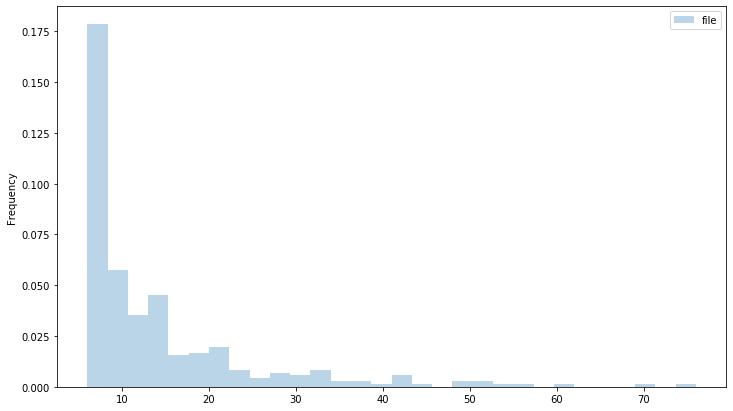

In [9]:
qtd_images.plot.hist(alpha=0.3, density = True, figsize=(12,7), bins=30)

## Selecting People

In [10]:
people = qtd_images.index.values
len(people)

305

In [11]:
random.shuffle(people)
people = people[:25]
people

array(['Li_Zhaoxing', 'Al_Sharpton', 'Luiz_Inacio_Lula_da_Silva',
       'Luis_Ernesto_Derbez_Bautista', 'Jonathan_Edwards', 'Jelena_Dokic',
       'Kim_Ryong-sung', 'Cameron_Diaz', 'Tommy_Haas', 'Boris_Becker',
       'Dennis_Kucinich', 'Bill_Simon', 'Angelina_Jolie', 'Hans_Blix',
       'Mahmoud_Abbas', 'Renee_Zellweger', 'David_Nalbandian',
       'Ana_Palacio', 'Sheryl_Crow', 'Bob_Stoops', 'Michael_Bloomberg',
       'Amelia_Vega', 'Elsa_Zylberstein', 'Jean-David_Levitte',
       'Amelie_Mauresmo'], dtype=object)

In [12]:
face_embeddings = face_embeddings.loc[face_embeddings['name'].isin(people)]

## Features Separation

In [13]:
features = pd.DataFrame(face_embeddings['embeddings'].values.tolist(), index = face_embeddings.index)

In [14]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
291,0.007002,0.362790,0.201460,0.000000,0.000000,0.522367,0.044118,0.0,2.112407,8.072944,...,0.000000,0.000000,3.156688,11.793030,2.342151,0.709308,0.015310,0.0,7.532262,0.084100
292,0.081950,0.000000,0.001024,0.032101,0.258472,0.067465,0.000683,0.0,1.689882,12.112955,...,0.007222,0.000000,0.000000,11.230347,3.352561,1.768222,0.081707,0.0,6.187569,0.061673
293,0.000000,0.474231,0.068376,0.000000,0.000000,0.342294,0.000000,0.0,1.357089,6.917535,...,0.015549,0.000000,3.084498,10.259319,1.184812,2.911998,0.000000,0.0,8.277770,0.000000
294,0.000000,1.021055,0.655525,0.000000,0.010457,0.051164,0.038163,0.0,0.000000,5.830760,...,0.229831,0.116413,2.048734,9.897505,3.665378,0.735009,0.021296,0.0,3.114635,0.029181
295,0.017310,0.265392,0.496930,0.000000,0.000000,0.761715,0.000000,0.0,0.656949,7.131641,...,0.000000,0.034284,0.179134,11.280205,1.743051,3.791251,0.052861,0.0,7.042139,0.005638


## Scaling

In [15]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)

In [16]:
features_scaled

array([[6.29127751e-04, 1.80986220e-02, 1.41067257e-02, ...,
        0.00000000e+00, 6.29219918e-01, 5.29146494e-03],
       [7.36323304e-03, 0.00000000e+00, 7.17080593e-05, ...,
        0.00000000e+00, 5.16888755e-01, 3.88036827e-03],
       [0.00000000e+00, 2.36581094e-02, 4.78783114e-03, ...,
        0.00000000e+00, 6.91497175e-01, 0.00000000e+00],
       ...,
       [2.84550635e-04, 1.96697116e-03, 2.70691899e-01, ...,
        0.00000000e+00, 1.25100719e-01, 5.65028998e-03],
       [7.29292102e-02, 2.55629386e-03, 2.53236096e-01, ...,
        0.00000000e+00, 1.02926134e-01, 4.47414544e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.39449228e-03, 2.05916400e-01, 3.52644204e-01]])

## Silhuoette Analysis

Look for elbow evaluation

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [17]:
import silhouette_paulo

Computing clusters from 2 to 51


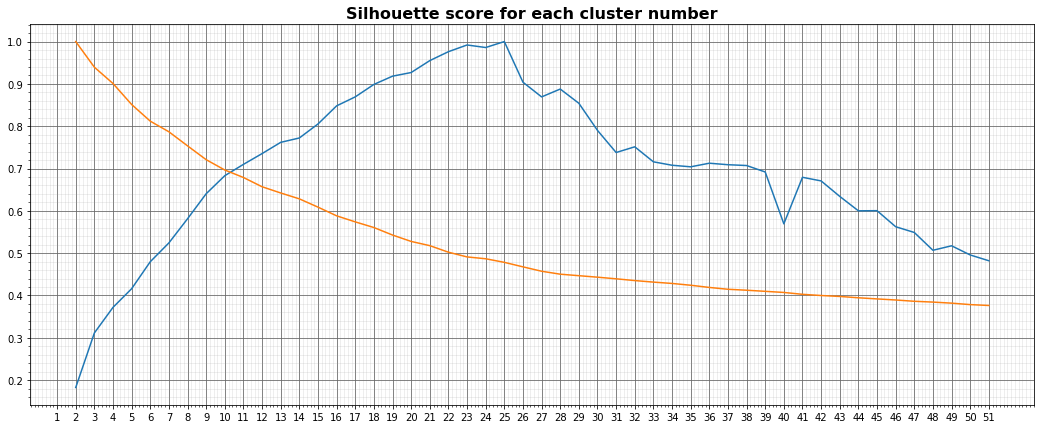

In [18]:
silhouette_paulo.analyze(features_scaled, [i+2 for i in range(len(people)*2)], show_individual_graphs = False)

## Clustering
See k-means in tensorflow:  https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/experimental/KMeans

In [36]:
model = KMeans(n_clusters=11, verbose = 0, random_state=42)
#model = MeanShift(bandwidth = len(people))

In [37]:
cluster_labels = model.fit_predict(features_scaled)
#cluster_labels = kmeans.fit_predict(features)

In [38]:
features['Cluster'] = cluster_labels
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
136,0.285112,0.000000,2.982219,0.000000,0.0,0.014253,0.250213,2.120276,1.811081,1.107355,...,0.000000,0.670803,0.173897,0.150309,1.270534,0.149858,2.970650,4.818972,0.739195,2
137,0.000000,0.000816,0.000000,0.103347,0.0,2.681821,0.009428,0.034006,0.406077,0.000000,...,0.039906,5.745759,0.000000,2.617784,0.021651,0.210376,0.513528,7.068231,1.784879,2
138,0.171944,0.144710,0.348655,0.603357,0.0,0.264355,0.437152,0.000000,2.042786,0.023642,...,0.000000,6.078012,0.000000,1.007148,0.046262,0.027284,2.050681,5.547115,9.945123,2
139,0.000000,0.156724,2.907073,0.000000,0.0,1.345676,0.000000,0.115379,0.000000,0.415684,...,0.000000,0.089016,0.060941,3.017060,0.000000,0.169507,0.175499,5.466408,2.539478,2
140,0.434134,0.002837,0.000000,0.009787,0.0,4.720340,0.054043,0.715260,2.199953,0.000000,...,0.000000,8.910540,0.541646,1.643448,0.000000,1.048972,0.622555,14.612202,0.152379,2


## Analyzing Clusters

In [39]:
features_scaled = pd.DataFrame(features_scaled, index = features.index)
features_scaled['Cluster'] = cluster_labels
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
136,0.037720,0.000000,0.424233,0.000000,0.0,0.000805,0.058911,0.283639,0.203881,0.118151,...,0.000000,0.075282,0.027364,0.013555,0.232484,0.021889,0.271840,0.260868,0.045673,2
137,0.000000,0.000216,0.000000,0.020774,0.0,0.151539,0.002220,0.004549,0.045714,0.000000,...,0.003805,0.644827,0.000000,0.236068,0.003962,0.030729,0.046992,0.382629,0.110283,2
138,0.022748,0.038284,0.049598,0.121280,0.0,0.014938,0.102925,0.000000,0.229965,0.002522,...,0.000000,0.682115,0.000000,0.090823,0.008465,0.003985,0.187655,0.300285,0.614486,2
139,0.000000,0.041462,0.413543,0.000000,0.0,0.076039,0.000000,0.015435,0.000000,0.044352,...,0.000000,0.009990,0.009590,0.272074,0.000000,0.024759,0.016060,0.295917,0.156908,2
140,0.057435,0.000751,0.000000,0.001967,0.0,0.266727,0.012724,0.095684,0.247658,0.000000,...,0.000000,1.000000,0.085232,0.148204,0.000000,0.153218,0.056969,0.791012,0.009415,2


In [40]:
features_names = features.copy()

In [41]:
features_names['name'] = face_embeddings['name']

In [42]:
people_clusters = features_names[['name', 'Cluster']].copy()

In [43]:
people_clusters['qtd'] = cluster_labels

In [44]:
qtd_clusters = people_clusters.groupby(['Cluster', 'name']).count()
qtd_clusters

qtd
Cluster name                     
0       Justin_Timberlake       8
1       Alejandro_Toledo       14
2       Juan_Carlos_Ferrero    28
3       John_Negroponte        28
4       Meryl_Streep           14
5       Paul_Martin             8
6       Alejandro_Toledo        1
        Paul_Wolfowitz         10
7       John_Negroponte         3
        Meryl_Streep            1
        Mohammed_Al-Douri      14
8       Charlton_Heston         6
9       Catherine_Zeta-Jones   11
        Mohammed_Al-Douri       1
10      Alejandro_Toledo       23

In [45]:
qtd_clusters = people_clusters.groupby(['name','Cluster']).count()
qtd_clusters

qtd
name                 Cluster     
Alejandro_Toledo     1         14
                     6          1
                     10        23
Catherine_Zeta-Jones 9         11
Charlton_Heston      8          6
John_Negroponte      3         28
                     7          3
Juan_Carlos_Ferrero  2         28
Justin_Timberlake    0          8
Meryl_Streep         4         14
                     7          1
Mohammed_Al-Douri    7         14
                     9          1
Paul_Martin          5          8
Paul_Wolfowitz       6         10

In [46]:
features_scaled.groupby('Cluster', axis = 0).std().transpose().describe()

Cluster,0,1,2,3,4,5,6,7,8,9,10
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,0.116905,0.094110,0.116561,0.089923,0.099206,0.109079,0.116184,0.139203,0.118507,0.133467,0.110740
std,0.102821,0.080095,0.084393,0.072013,0.087328,0.095560,0.090139,0.086092,0.108735,0.098684,0.084316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028434,0.023899,0.044322,0.028861,0.024111,0.028192,0.037929,0.066562,0.028324,0.048607,0.036285
50%,0.090557,0.075047,0.100596,0.074354,0.076729,0.084687,0.096223,0.127447,0.088654,0.111022,0.093777
75%,0.181398,0.151157,0.187526,0.140025,0.157121,0.167385,0.179523,0.209798,0.181970,0.208619,0.178917
max,0.440553,0.343686,0.329669,0.338681,0.379698,0.474609,0.385227,0.371109,0.459518,0.391352,0.351226


In [47]:
qtd_clusters.sum()

qtd    170
dtype: int64

## Evaluation Classification
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [48]:
dt_eval = features_names[['Cluster', 'name']].copy()

In [49]:
dt_eval.shape

(170, 2)

In [50]:
labels_true = dt_eval['name'].values


In [51]:
labels_pred = dt_eval['Cluster'].values

In [52]:
metrics.homogeneity_score(labels_true,labels_pred)

0.9484594620057041

In [60]:
face_embeddings.loc[(dt_eval['Cluster'] == 7) & (dt_eval['name'] == 'John_Negroponte')]

,file,name,embeddings,complete_url
1554,John_Negroponte_0003.jpg,John_Negroponte,"[0.95598954, 0.0, 0.0, 0.0, 0.70100164, 17.697...",dataset/John_Negroponte/John_Negroponte_0003.jpg
1566,John_Negroponte_0004.jpg,John_Negroponte,"[0.07201728, 0.011171901, 0.5596417, 0.0005444...",dataset/John_Negroponte/John_Negroponte_0004.jpg
1576,John_Negroponte_0023.jpg,John_Negroponte,"[1.6525468, 0.0, 0.03995183, 0.0, 4.4809127, 6...",dataset/John_Negroponte/John_Negroponte_0023.jpg
